### Instructions
#### Please download and import the dataset Cardiac.csv into Jupyter Notebook to attempt this quiz.

 

### Problem Statement: 

 

Cardiac arrest is an abrupt loss of heart functioning. The condition generally results from a problem with the heart’s electrical system that disturbs the heart's pumping action. This malfunction can cause a life-threatening condition. Due to cardiac arrest, millions of people die every year. Hence, it would be a lifesaver if we can build a system that is capable of predicting heart failure. 

Certain medical parameters help in predicting if a person is at risk of getting a cardiac arrest. Such features are stored in ‘Cardiac.csv’. 

 

### Attribute Information- 

1. Gender: This feature represents the gender of a person; 0- Other, 1- Male, 2- Female. 
2. Chain_smoker: This feature represents if the person is a chain smoker or not
3. Consumes_other_tobacco_products:  This feature represents if the person consumes other tobacco products.
4. HighBP:  This feature represents if the person has high blood pressure or not.
5. Obese:  This feature represents if the person is obese or not.
6. Diabetes:  This feature represents if the person has diabetes or not.
7. Metabolic_syndrome:  This feature represents if the person has metabolic syndrome or not
8. Use_of_stimulant_drugs:  This feature represents if the person uses stimulant drugs or not
9. Family_history:  This feature represents if someone in the family had cardiac issues or not.
10. History_of_preeclampsia:  This feature represents if the person has a history of preeclampsia.
11. CABG_history:  This feature represents if the person has a history of Coronary artery bypass surgery or not.
12. Respiratory_illness:  This feature represents if the person has any respiratory illness.
13. UnderRisk:  This feature represents if the person is at risk of getting a cardiac arrest or not.
 

### Instructions: 

Kindly go through the guidelines before attempting the quiz. 

 

1. Ensure that there is a proper internet connection while taking up the quiz. Any disruption in the connection will automatically submit your quiz.
2. Attempt the quiz only when you are prepared and have enough time to finish it. Please ensure you attempt the quiz well before the due date. No extension will be provided for any quiz once the deadline is passed.
3. The quiz once opened, must be completed within the time frame provided. You CANNOT start the quiz, leave it unattended for an extended period of time and come back later to finish.
4. Use random_state = 1, wherever applicable.
5. No re-attempts will be provided if the quiz gets submitted for any of the above-mentioned reasons.
6. If you face any other technical issues on Olympus, you should share the screenshot with your Program Manager so that the team can understand and resolve it on priority.
**Note** - Train the models with default parameters unless instructed to use certain hyperparameters.

In [69]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Loading Data

In [2]:
crda = pd.read_csv("Cardiac.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the data
crda.shape

(889, 13)

<IPython.core.display.Javascript object>

## Data Overview

In [4]:
# let's create a copy of the data
data = crda.copy()

<IPython.core.display.Javascript object>

In [5]:
# let's view the first 5 rows of the data
data.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


<IPython.core.display.Javascript object>

In [6]:
# let's view the last 5 rows of the data
data.tail()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
884,Female,0,1,0,1,0,0,0,1,0,0,0,no
885,Male,0,1,0,1,0,0,0,1,0,0,0,no
886,Male,0,0,1,1,0,0,0,1,0,0,0,yes
887,Female,0,1,0,0,0,0,1,1,0,0,0,no
888,Male,1,1,0,1,0,0,0,1,0,0,0,yes


<IPython.core.display.Javascript object>

In [7]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

<IPython.core.display.Javascript object>

In [8]:
# let's check for duplicate values in the data
data.duplicated().sum()

789

<IPython.core.display.Javascript object>

In [9]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Chain_smoker,889.000,0.120,0.326,0.000,0.000,0.000,0.000,1.000
Consumes_other_tobacco_products,889.000,0.838,0.369,0.000,1.000,1.000,1.000,1.000
HighBP,889.000,0.087,0.281,0.000,0.000,0.000,0.000,1.000
Obese,889.000,0.919,0.273,0.000,1.000,1.000,1.000,1.000
Diabetes,889.000,0.055,0.228,0.000,0.000,0.000,0.000,1.000
Metabolic_syndrome,889.000,0.043,0.202,0.000,0.000,0.000,0.000,1.000
Use_of_stimulant_drugs,889.000,0.082,0.275,0.000,0.000,0.000,0.000,1.000
Family_history,889.000,0.926,0.262,0.000,1.000,1.000,1.000,1.000
History_of_preeclampsia,889.000,0.018,0.133,0.000,0.000,0.000,0.000,1.000
CABG_history,889.000,0.021,0.145,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

## Data Preprocessing

**Let's check the count of each unique category in each of the categorical variables.** 

In [10]:
# Making a list of all categorical variables
cat_col = [
    "Gender",
    "UnderRisk",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Male      607
Female    256
Other      26
Name: Gender, dtype: int64
----------------------------------------
no     699
yes    190
Name: UnderRisk, dtype: int64
----------------------------------------


<IPython.core.display.Javascript object>

## EDA

### Univariate

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

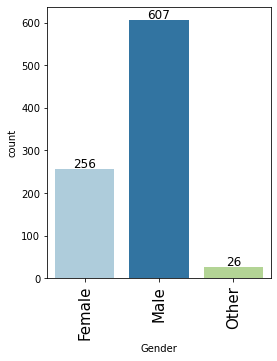

<IPython.core.display.Javascript object>

In [13]:
# observations on Gender
labeled_barplot(data, "Gender")

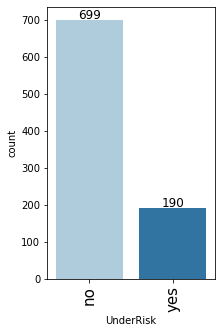

<IPython.core.display.Javascript object>

In [14]:
# observations on UnderRisk
labeled_barplot(data, "UnderRisk")

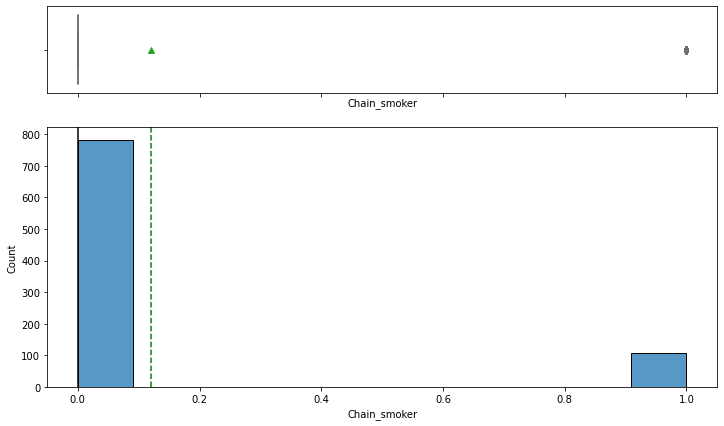

<IPython.core.display.Javascript object>

In [15]:
# observations on Chain_smoker
histogram_boxplot(data, "Chain_smoker")

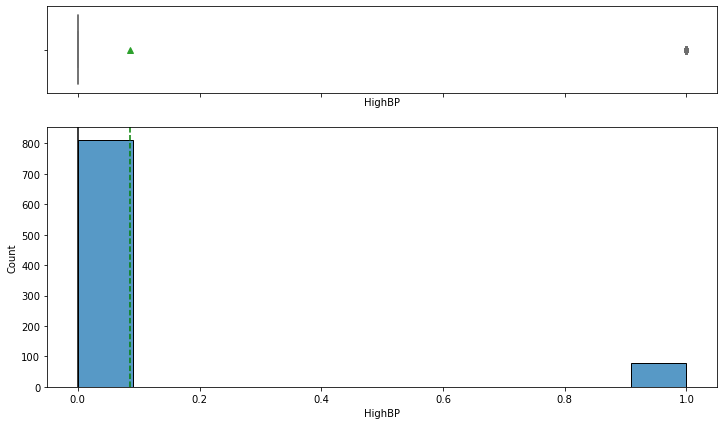

<IPython.core.display.Javascript object>

In [16]:
# observations on HighBP
histogram_boxplot(data, "HighBP")

### Bivariate Analysis

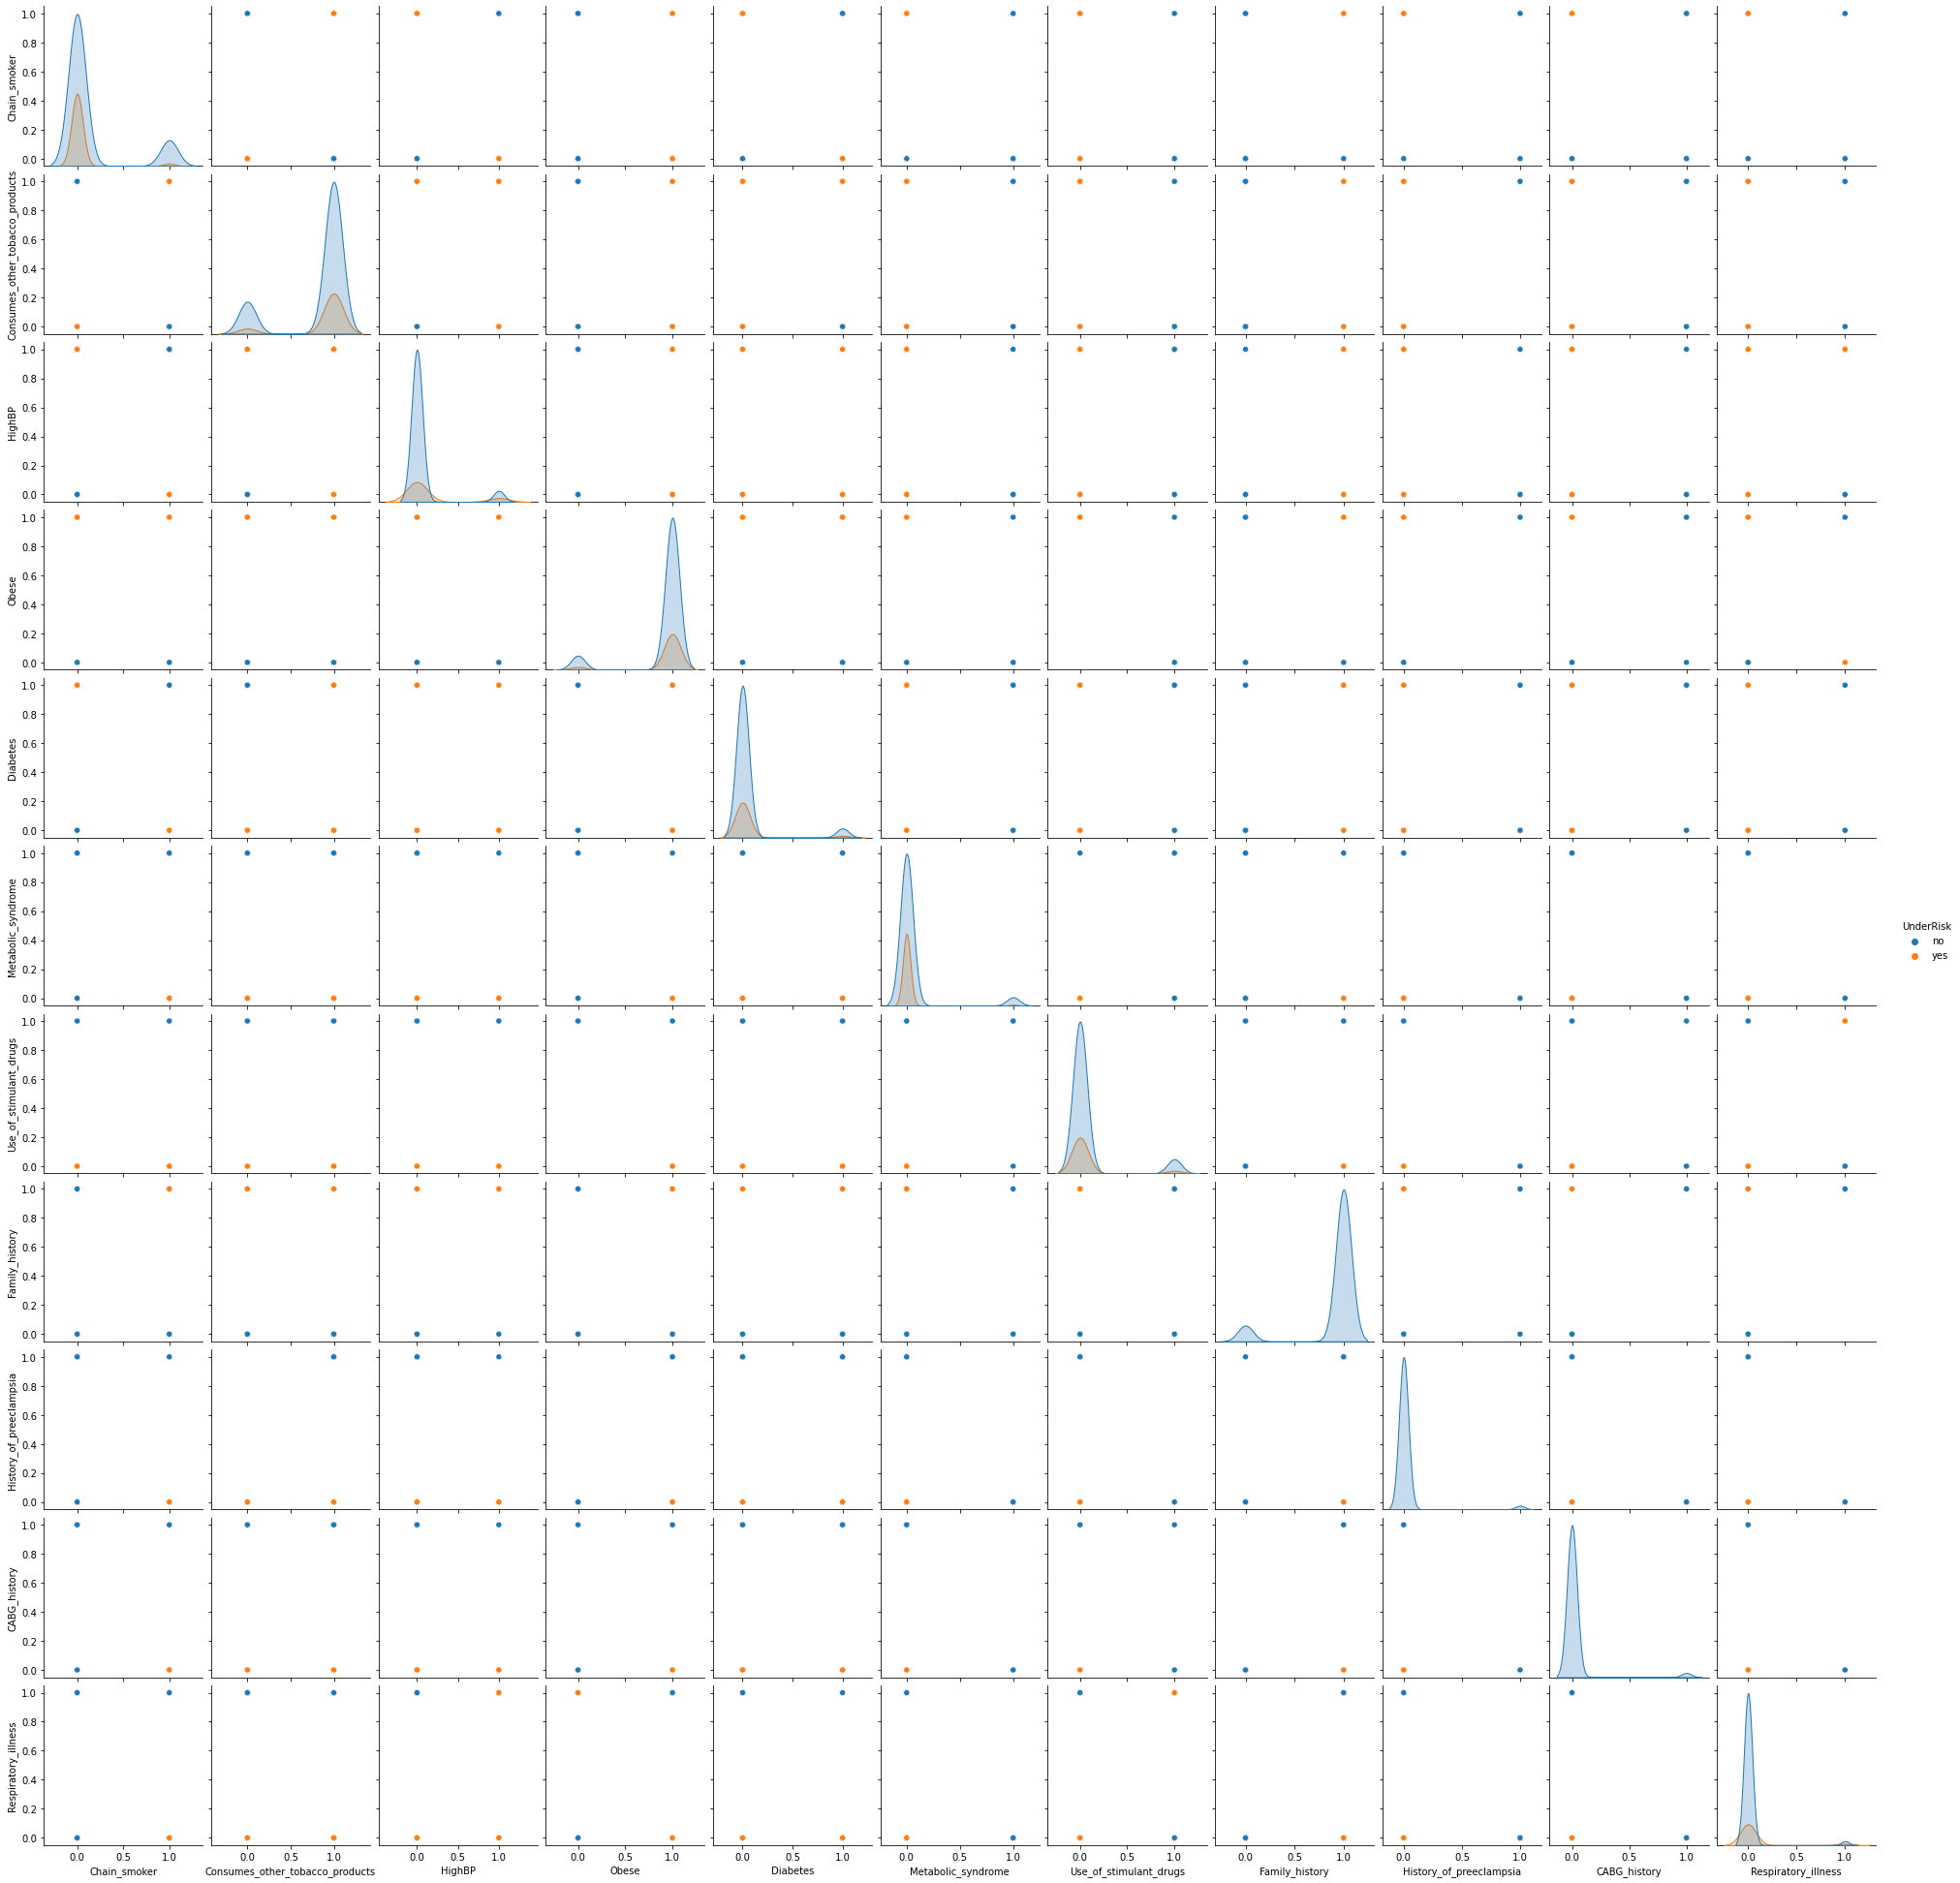

<IPython.core.display.Javascript object>

In [17]:
sns.pairplot(data, hue="UnderRisk")

<AxesSubplot:xlabel='Gender', ylabel='HighBP'>

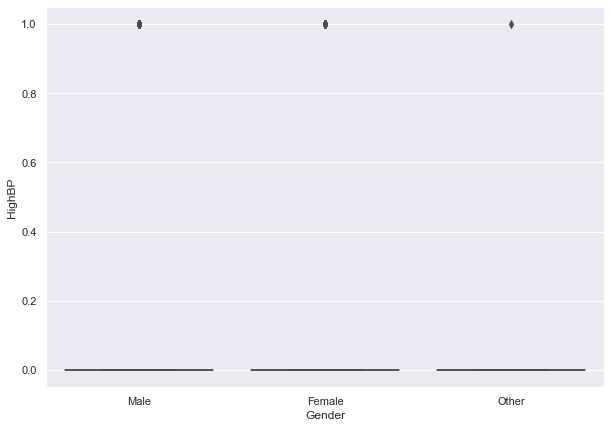

<IPython.core.display.Javascript object>

In [18]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="HighBP", x="Gender", data=data, orient="vertical")

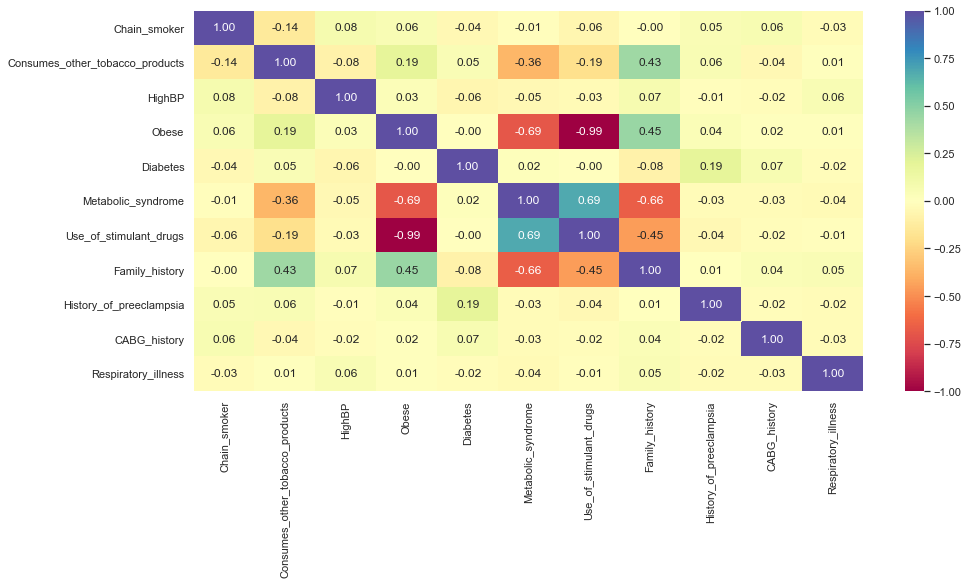

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Data Preparation for Modeling

In [97]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [98]:
# Separating target variable and other variables
X = data1.drop(columns="UnderRisk")
X = pd.get_dummies(X, drop_first=True)

Y = data1["UnderRisk"].apply(lambda x: 1 if x == "yes" else 0)

<IPython.core.display.Javascript object>

In [99]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(533, 13) (178, 13) (178, 13)


<IPython.core.display.Javascript object>

### Missing-Value Treatment

* We will use median to impute missing values in Income column.

In [60]:
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

### Logistic Regression 

In [64]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

In [65]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.788,0.035,0.571,0.066


<IPython.core.display.Javascript object>

In [66]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.770,0.026,0.200,0.047


<IPython.core.display.Javascript object>

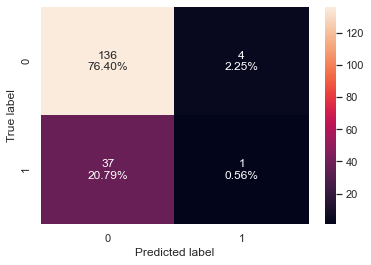

<IPython.core.display.Javascript object>

In [67]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

In [100]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 114
Before Oversampling, counts of label 'No': 419 

After Oversampling, counts of label 'Yes': 419
After Oversampling, counts of label 'No': 419 

After Oversampling, the shape of train_X: (838, 13)
After Oversampling, the shape of train_y: (838,) 



<IPython.core.display.Javascript object>

In [104]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 114
Before Undersampling, counts of label 'No': 419 

After Undersampling, counts of label 'Yes': 114
After Undersampling, counts of label 'No': 114 

After Undersampling, the shape of train_X: (228, 13)
After Undersampling, the shape of train_y: (228,) 



<IPython.core.display.Javascript object>

### Logistic Regression on oversampled data

In [71]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

In [72]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.673,0.773,0.644,0.703


<IPython.core.display.Javascript object>

In [73]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.601,0.632,0.296,0.403


<IPython.core.display.Javascript object>

In [84]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [85]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    # Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Accuracy of the model
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    # Recall of the model
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    # Precision of the model
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

### Bagging Classifier

In [109]:
# base_estimator for bagging classifier is a decision tree by default
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [110]:
# Calculating different metrics on train set
bagg_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator, X_train_over, y_train_over
)
print("Training performance:")
bagg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.699,0.790,0.669,0.724


<IPython.core.display.Javascript object>

In [111]:
# Calculating different metrics on validation set
bagg_model_val_perf = model_performance_classification_sklearn(
    bagging_estimator, X_val, y_val
)
print("Validation performance:")
bagg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.573,0.605,0.274,0.377


<IPython.core.display.Javascript object>

### Random Forest Classifier

In [92]:
# Train the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [93]:
# Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score = get_metrics_score(rf_estimator)

Accuracy on training set :  0.801125703564728
Accuracy on test set :  0.7528089887640449
Recall on training set :  0.17543859649122806
Recall on test set :  0.10526315789473684
Precision on training set :  0.625
Precision on test set :  0.2857142857142857


<IPython.core.display.Javascript object>

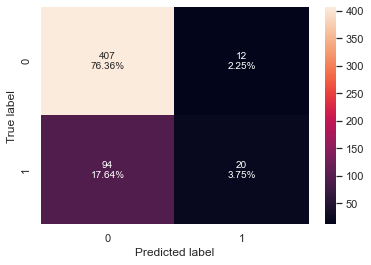

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [122]:
rf = RandomForestClassifier(random_state=1)

rf.fit(X_train, y_train)

confusion_matrix(y_train, rf.predict(X_train))

array([[407,  12],
       [ 94,  20]])

<IPython.core.display.Javascript object>

### AdaBoost Classifier

In [112]:
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [113]:
# Calculating different metrics on train set
abc_over_model_train_perf = model_performance_classification_sklearn(
    abc_over, X_train_over, y_train_over
)
print("Training performance:")
abc_over_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.669,0.785,0.638,0.704


<IPython.core.display.Javascript object>

In [114]:
abc_un = AdaBoostClassifier(random_state=1)
abc_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [115]:
# Calculating different metrics on train set
abc_un_model_train_perf = model_performance_classification_sklearn(
    abc_un, X_train_un, y_train_un
)
print("Training performance:")
abc_un_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.706,0.842,0.662,0.741


<IPython.core.display.Javascript object>

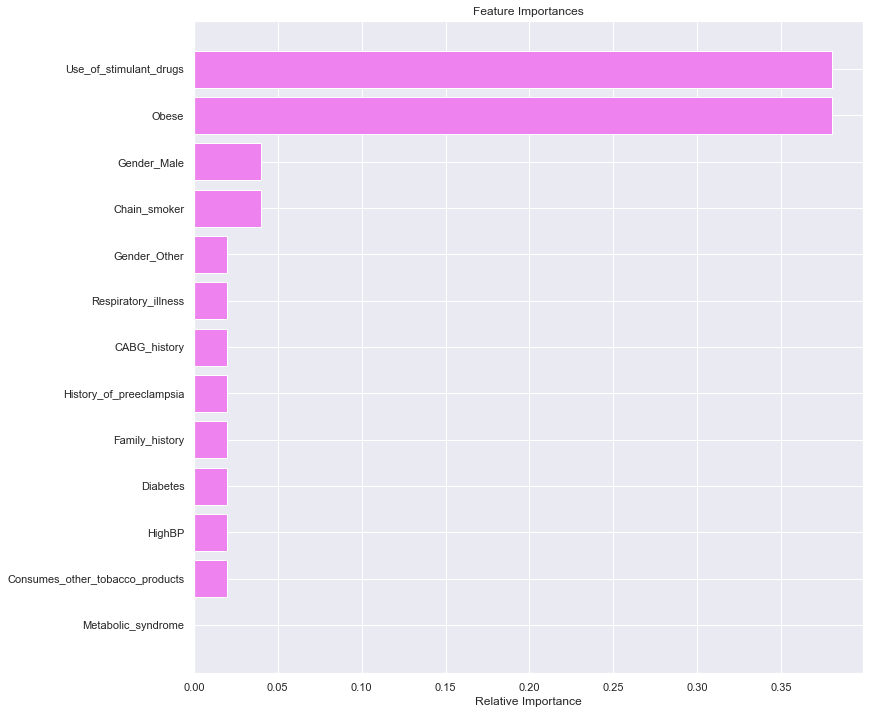

<IPython.core.display.Javascript object>

In [117]:
importances = abc_over.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [101]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("LogReg", LogisticRegression(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )

    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 78.2788296041308
Random forest: 78.04360298336202
GBM: 78.2788296041308
Adaboost: 77.80550774526678
Xgboost: 77.5645438898451
dtree: 77.80263912794034
LogReg: 76.61503155479059

Training Performance:

Bagging: 17.543859649122805
Random forest: 17.543859649122805
GBM: 7.017543859649122
Adaboost: 12.280701754385964
Xgboost: 8.771929824561402
dtree: 17.543859649122805
LogReg: 3.508771929824561


<IPython.core.display.Javascript object>

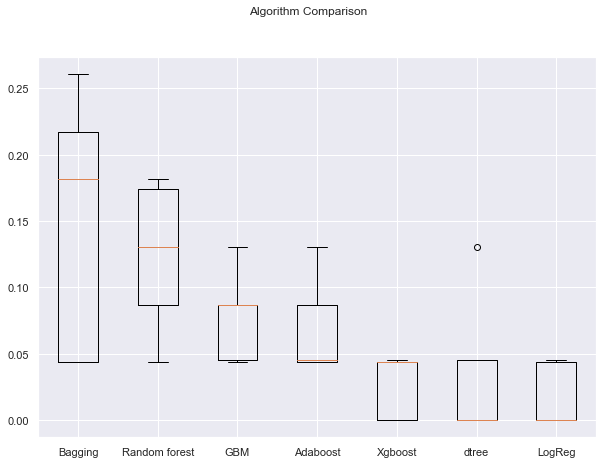

<IPython.core.display.Javascript object>

In [96]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [121]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)
#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9642857142857142:
CPU times: user 422 ms, sys: 28.4 ms, total: 450 ms
Wall time: 4.87 s


<IPython.core.display.Javascript object>

In [126]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics

from sklearn.model_selection import RandomizedSearchCV


# defining model

model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV

randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV

randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9642857142857142:


<IPython.core.display.Javascript object>

## Hyperparameter Tuning

**We will tune Adaboost and xgboost models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

In [26]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [27]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Adaboost

### GridSearchCV

In [28]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'learning_rate': 1, 'n_estimators': 50} 
Score: 0.158102766798419
CPU times: user 1.7 s, sys: 252 ms, total: 1.95 s
Wall time: 16.2 s


<IPython.core.display.Javascript object>

In [29]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, random_state=1)

<IPython.core.display.Javascript object>

In [30]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training performance:")
Adaboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.801,0.193,0.611,0.293


<IPython.core.display.Javascript object>

In [31]:
# Calculating different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("Validation performance:")
Adaboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.719,0.132,0.227,0.167


<IPython.core.display.Javascript object>

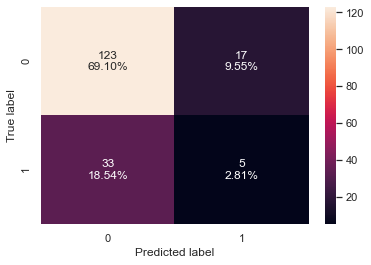

<IPython.core.display.Javascript object>

In [32]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

### RandomizedSearchCV

In [33]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.158102766798419:
CPU times: user 371 ms, sys: 27.8 ms, total: 399 ms
Wall time: 4.82 s


<IPython.core.display.Javascript object>

In [34]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, random_state=1)

<IPython.core.display.Javascript object>

In [35]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.801,0.193,0.611,0.293


<IPython.core.display.Javascript object>

In [36]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.719,0.132,0.227,0.167


<IPython.core.display.Javascript object>

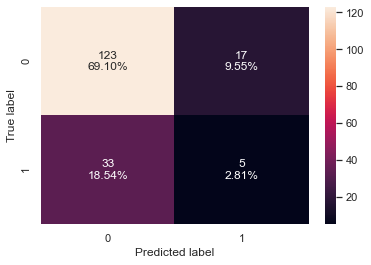

<IPython.core.display.Javascript object>

In [37]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

## XGBoost

### GridSearchCV  

In [38]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 5, 'scale_pos_weight': 10, 'subsample': 0.8} with CV score=0.9913043478260869:
CPU times: user 25.3 s, sys: 1.91 s, total: 27.2 s
Wall time: 28min 47s


<IPython.core.display.Javascript object>

In [39]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    subsample=0.8,
    learning_rate=0.01,
    gamma=0,
    eval_metric="logloss",
    reg_lambda=5,
    max_depth=1,
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=10, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [40]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
xgboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.296,1.000,0.233,0.378


<IPython.core.display.Javascript object>

In [41]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.287,1.000,0.230,0.374


<IPython.core.display.Javascript object>

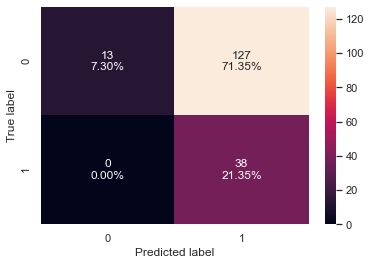

<IPython.core.display.Javascript object>

In [42]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

### RandomizedSearchCV

In [43]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9913043478260869:
CPU times: user 680 ms, sys: 56.7 ms, total: 737 ms
Wall time: 45.2 s


<IPython.core.display.Javascript object>

In [44]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=0.9,
    learning_rate=0.01,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=5,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [45]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.296,1.000,0.233,0.378


<IPython.core.display.Javascript object>

In [46]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.287,1.000,0.230,0.374


<IPython.core.display.Javascript object>

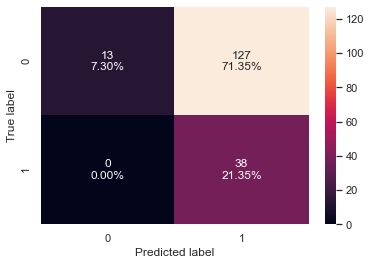

<IPython.core.display.Javascript object>

In [47]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

## Comparing all models

In [48]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train.T,
        Adaboost_random_train.T,
        xgboost_grid_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost Tuned with Grid search,AdaBoost Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.801,0.801,0.296,0.296
Recall,0.193,0.193,1.000,1.000
Precision,0.611,0.611,0.233,0.233
F1,0.293,0.293,0.378,0.378


<IPython.core.display.Javascript object>

In [49]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        Adaboost_grid_val.T,
        Adaboost_random_val.T,
        xgboost_grid_val.T,
        xgboost_random_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost Tuned with Grid search,AdaBoost Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.719,0.719,0.287,0.287
Recall,0.132,0.132,1.000,1.000
Precision,0.227,0.227,0.230,0.230
F1,0.167,0.167,0.374,0.374


<IPython.core.display.Javascript object>

#### Performance on the test set

In [50]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned1, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.264,1.000,0.225,0.367


<IPython.core.display.Javascript object>

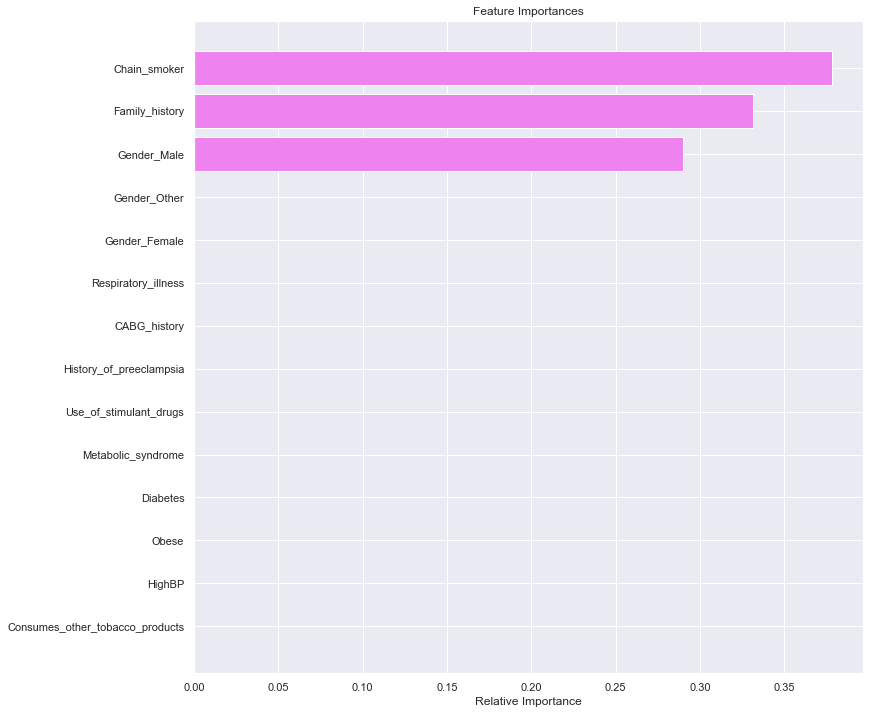

<IPython.core.display.Javascript object>

In [51]:
feature_names = X.columns
importances = xgb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [52]:
# creating a list of numerical variables
numerical_features = [
    "Chain_smoker",
    "Consumes_other_tobacco_products",
    "HighBP",
    "Obese",
    "Diabetes",
    "Metabolic_syndrome",
    "Use_of_stimulant_drugs",
    "Family_history",
    "History_of_preeclampsia",
    "CABG_history",
    "Respiratory_illness",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Gender"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [53]:
# Separating target variable and other variables
X = data1.drop(columns="UnderRisk")
Y = data1["UnderRisk"]

<IPython.core.display.Javascript object>

In [54]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(622, 12) (267, 12)


<IPython.core.display.Javascript object>

In [55]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=1,
                learning_rate=0.05,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=10,
                max_depth=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Chain_smoker',
                                                   'Consumes_other_tobacco_products',
                                                   'HighBP', 'Obese',
                                                   'Diabetes',
                                                   'Metabolic_syndrome',
                                                   'Use_of_stimulant_drugs',
                                                   'Family_history',
                                                   'History_of_preeclampsia',
                                                   'CABG_history',
                           

<IPython.core.display.Javascript object>

In [56]:
# transforming and predicting on test data
model.predict(X_test)

array(['yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
 

<IPython.core.display.Javascript object>